주차별 평균으로 discontinuity 확인

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [3]:
input_year_list = ['2021', '2022', '2023']

In [4]:
input_pl = 'python'

In [5]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [6]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [7]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [8]:
src_df.head()

,idx,id,src
0,19455,77167050,import ipywidgets as widgets\n\nquestion_label...
1,19456,77167055,"`from transformers import AutoTokenizer, AutoM..."
2,19457,77167055,error: TODO: expressions are not yet supported...
3,19458,77167101,"sql1 = ""SELECT state FROM YO WHERE function = ..."
4,19459,77167156,ldata1x\nldata2x\nldata3x\nldata4x\n


In [9]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [10]:
calc_com_df.reset_index(drop=True, inplace=True)

In [11]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [12]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [13]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [14]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [15]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [16]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [17]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [18]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266624 entries, 0 to 1266623
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   idx     1266624 non-null  int64 
 1   id      1266624 non-null  int64 
 2   src     1266624 non-null  object
dtypes: int64(2), object(1)
memory usage: 29.0+ MB


In [19]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [20]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [21]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


In [22]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [23]:
# calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [24]:
with open(f'{conf.DATA_PATH}/data/cc_python_raw_df.pkl', 'wb') as f:
    pickle.dump(calc_ed_com_df, f)

In [25]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0
...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0


In [26]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0
...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0


In [27]:
calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2022,11,30)).dt.days/7)


/tmp/ipykernel_1084318/3161297218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2022,11,30)).dt.days/7)


In [28]:
calc_ed_com_df[(calc_ed_com_df['rel_week']>=-52)&(calc_ed_com_df['rel_week']<52)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 293704 entries, 0 to 940800
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    293704 non-null  int64  
 1   cdate                 293704 non-null  object 
 2   idx                   293704 non-null  int64  
 3   src                   293704 non-null  object 
 4   Path                  293704 non-null  object 
 5   File Name             293704 non-null  object 
 6   Cognitive Complexity  293704 non-null  float64
 7   rel_week              293704 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 20.2+ MB


In [29]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['rel_week']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [30]:
calc_ed_com_mean_df.head()

,rel_week,id,idx,Cognitive Complexity
0,-100.0,6.555671e+07,390480.428283,1.130909
1,-99.0,6.564128e+07,379233.726323,1.047586
2,-98.0,6.574825e+07,384568.220445,1.087390
3,-97.0,6.585632e+07,367778.865407,0.901617
4,-96.0,6.596760e+07,355703.084840,0.979995


In [31]:
chow_df = calc_ed_com_mean_df[['rel_week', 'Cognitive Complexity']]

In [32]:
chow_df = chow_df[(chow_df['rel_week']>=-52)&(chow_df['rel_week']<52)]

In [33]:
x = chow_df['rel_week'].values

In [34]:
np.argmax(np.where(x <= 0)) 

52

In [35]:
chow_df_1year = chow_df[chow_df['rel_week']>=-52]
st_chow_1year = st.Stats(chow_df_1year['rel_week'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


In [36]:
np.argmax(np.where(x < 0))

51

In [37]:
x[:51]

array([-52., -51., -50., -49., -48., -47., -46., -45., -44., -43., -42.,
       -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.])

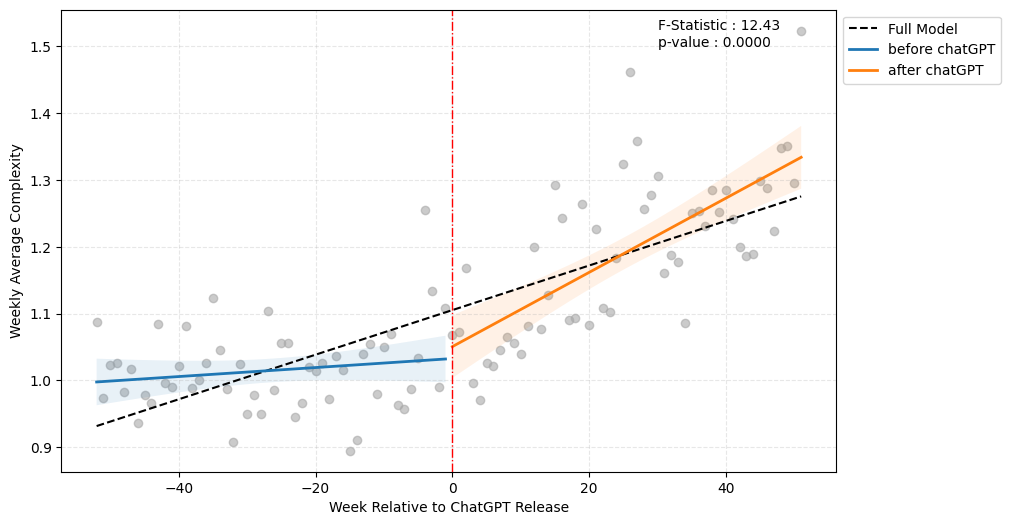

In [42]:
x = chow_df_1year['rel_week'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x < 0))+1
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_1year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_1year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.1)

plt.plot(x2, st_chow_1year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.1)

plt.text(30, 1.5, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 10) #
plt.axvline(x=0,     color='red',    linestyle='-.', linewidth=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.xlabel("Week Relative to ChatGPT Release")
plt.ylabel("Weekly Average Complexity")
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("./fig/Result_Fig3.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화
plt.show()


<Figure size 640x480 with 0 Axes>